<a href="https://colab.research.google.com/github/Kealfeyne/Samsung_Bootcamp_Classic_ML/blob/main/3_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [152]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
dataset = pd.read_csv('/content/drive/MyDrive/Track3_dataset.csv')

#Обработаем данные

##Общее

In [154]:
dataset.head(3)

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.875,0.902847,7.45872,6.032490,1.0061,7.44575,6.30365,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.750,-4.069330,3.76168,8.279720,-5.9725,3.22273,6.90897,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.375,-2.007540,-9.60180,0.773674,-1.8035,-9.58937,1.07368,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8


In [155]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

In [156]:
dataset.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000


In [157]:
dataset.isna().sum().sort_values()

timestamp               0
subject_id              0
chestGyro3            809
chestOrientation4     809
chestOrientation3     809
chestOrientation2     809
chestOrientation1     809
chestMagne3           809
chestMagne2           809
chestMagne1           809
chestGyro1            809
chestAcc6_3           809
chestAcc6_2           809
chestAcc6_1           809
chestAcc16_3          809
chestAcc16_2          809
chestAcc16_1          809
chestTemperature      809
chestGyro2            809
ankleTemperature     2546
ankleAcc16_3         2546
ankleAcc6_1          2546
ankleAcc6_2          2546
ankleAcc6_3          2546
ankleGyro1           2546
ankleGyro2           2546
ankleAcc16_2         2546
ankleGyro3           2546
ankleMagne1          2546
ankleMagne2          2546
ankleMagne3          2546
ankleOrientation1    2546
ankleOrientation2    2546
ankleOrientation3    2546
ankleOrientation4    2546
ankleAcc16_1         2546
handOrientation3     4041
handAcc16_2          4041
handAcc16_3 

In [158]:
dataset.shape

(534601, 53)

In [159]:
dataset.drop(['timestamp', 'subject_id'], axis=1, inplace=True)

# Рассмотрим подходы

## Заполним пропуски медианами

In [160]:
for column in dataset.columns[dataset.isna().any()].tolist():
  dataset[column].fillna(dataset[column].median(), inplace=True)

In [161]:
dataset.isna().sum().sort_values().max()

0

In [162]:
def download_result(predictions, title, score):
  """Скачивает csv с predictions, скорость - """
  result = pd.DataFrame(predictions, columns=['activityID']).reset_index()

  predictions_values = result['activityID'].unique()

  dictionary = {predictions_values[i]: i + 1 for i in range(len(predictions_values))}

  result['activityID'] = result['activityID'].map(dictionary)

  result.to_csv(f"({round(score, 3)}) {title}.csv", index=False)
  files.download(f"({round(score, 3)}) {title}.csv")

In [163]:
from sklearn.metrics import silhouette_score

## Нормализуем данные (не дало результата)

In [164]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
def normalize_dataset(dataset):
  normalized_dataset = pd.DataFrame(MinMaxScaler(feature_range=(-1, 1)).fit_transform(dataset), columns=dataset.columns)
  return normalized_dataset

In [166]:
normalized_dataset = normalize_dataset(dataset)

##Попробуем выбрать колонки руками

In [167]:
dataset.columns

Index(['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
       'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2',
       'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
      dtype='object')

In [168]:
columns_to_cut = ['handMagne2', 'handMagne3', 'handOrientation1', \
                   'handOrientation3', 'handOrientation4', 'chestTemperature', 'chestMagne1', 'chestMagne3', \
                   'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'ankleTemperature', \
                   'ankleMagne2', 'ankleMagne3', 'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3']
cuted_dataset = dataset[columns_to_cut]

## Попробуем понизить размерность у похожих колонок (результат немного ухудшился)

In [169]:
from sklearn import decomposition

In [170]:
dataset.columns

Index(['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
       'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2',
       'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
      dtype='object')

In [171]:
lists_of_columns_to_pca = []
handMagne = ['handMagne1', 'handMagne2', 'handMagne3']
handOrientation = ['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']
chestMagne = ['chestMagne1', 'chestMagne2', 'chestMagne3']
chestOrientation = ['chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']
ankleMagne = ['ankleMagne1', 'ankleMagne2', 'ankleMagne3']
ankleOrientation = ['ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']
lists_of_columns_to_pca.append(handMagne)
lists_of_columns_to_pca.append(handOrientation)
lists_of_columns_to_pca.append(chestMagne)
lists_of_columns_to_pca.append(chestOrientation)
lists_of_columns_to_pca.append(ankleMagne)
lists_of_columns_to_pca.append(ankleOrientation)
lists_of_columns_to_pca

[['handMagne1', 'handMagne2', 'handMagne3'],
 ['handOrientation1',
  'handOrientation2',
  'handOrientation3',
  'handOrientation4'],
 ['chestMagne1', 'chestMagne2', 'chestMagne3'],
 ['chestOrientation1',
  'chestOrientation2',
  'chestOrientation3',
  'chestOrientation4'],
 ['ankleMagne1', 'ankleMagne2', 'ankleMagne3'],
 ['ankleOrientation1',
  'ankleOrientation2',
  'ankleOrientation3',
  'ankleOrientation4']]

In [172]:
columns_to_pca = [x for lst in lists_of_columns_to_pca for x in lst]

In [173]:
pca_dataset = dataset.drop(columns_to_pca, axis=1)
new_features_names = ['handMagne', 'handOrientation', 'chestMagne1', 'chestOrientation1', 'ankleMagne1', 'ankleOrientation1']

for lst, name in zip(lists_of_columns_to_pca, new_features_names):
  pca = decomposition.PCA(n_components=1)
  pca.fit(dataset[lst])
  pca_dataset = pd.concat([pca_dataset, pd.DataFrame(pca.transform(dataset[lst]), columns=[name])], axis=1)

In [174]:
pca_dataset

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,handMagne,handOrientation,chestMagne1,chestOrientation1,ankleMagne1,ankleOrientation1
0,34.8750,0.902847,7.458720,6.032490,1.006100,7.445750,6.303650,-0.021952,0.004114,-0.000752,...,-4.13847,0.043954,-0.025606,0.030239,-33.337362,-0.850878,-52.382851,0.037228,-29.178244,0.163807
1,29.7500,-4.069330,3.761680,8.279720,-5.972500,3.222730,6.908970,0.116054,-0.375968,-0.012890,...,-1.31267,-0.319186,-0.670163,1.786200,12.860684,-0.509858,7.615911,0.402618,17.701882,-0.501013
2,34.3750,-2.007540,-9.601800,0.773674,-1.803500,-9.589370,1.073680,0.020131,0.042189,-0.011507,...,-2.12294,0.065654,-0.009741,-0.006579,-13.653712,0.523624,-3.274707,-0.021551,-16.442308,1.070343
3,31.9375,-13.262200,5.854430,0.899334,-13.611500,5.915110,0.840377,1.715630,-0.050492,-1.829000,...,2.91851,2.970010,-0.163470,-3.495570,27.600924,0.603088,13.126922,-0.558256,-30.740987,1.006499
4,33.5000,-0.013940,8.665400,4.398210,0.144153,8.568160,4.822200,-0.006938,-0.007383,-0.032679,...,-2.47767,0.013953,-0.028172,-0.003737,-12.032121,-0.695581,-2.813739,-0.010094,1.818213,-0.786462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,33.8750,-9.084250,4.701220,2.890170,-9.689610,6.780770,3.975430,-0.157406,0.774189,4.369120,...,-4.12301,-0.693049,0.424520,-0.856836,2.547320,-0.860909,20.940055,0.695435,23.033760,-0.545179
534597,32.8750,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,-0.004642,...,-11.33120,1.619630,-1.767710,-3.050980,2.095083,-0.064560,1.971090,-0.702111,-25.389275,1.003551
534598,34.6875,-6.367550,2.321310,2.207640,-6.362460,2.330490,2.607610,0.206349,-0.359415,1.963340,...,-1.96102,-0.741392,-0.034144,-0.402013,10.177170,0.996608,-10.405191,-0.180602,-10.560015,0.554346
534599,28.0625,5.461940,10.436400,-9.073300,8.348860,5.765180,-6.143210,3.543910,2.757300,0.087904,...,-16.63240,-3.427920,0.352062,-5.577750,31.861689,0.120694,30.842180,-0.877329,14.975638,-0.862146


## Попробуем заменить похожие фичи новыми

In [175]:
lists_of_groups = lists_of_columns_to_pca # Можно изменить столбцы, но использую те, что и при PCA

columns_of_grouped = [x for lst in lists_of_groups for x in lst]
meaned_groups_dataset = dataset.drop(columns_of_grouped, axis=1)
new_features_names = ['handMagne', 'handOrientation', 'chestMagne1', 'chestOrientation1', 'ankleMagne1', 'ankleOrientation1']

for lst, name in zip(lists_of_groups, new_features_names):
  meaned_groups_dataset[name] = dataset[lst].mean(axis=1)

In [176]:
meaned_groups_dataset

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,handMagne,handOrientation,chestMagne1,chestOrientation1,ankleMagne1,ankleOrientation1
0,34.8750,0.902847,7.458720,6.032490,1.006100,7.445750,6.303650,-0.021952,0.004114,-0.000752,...,-4.13847,0.043954,-0.025606,0.030239,-11.635393,0.353775,5.720367,0.257672,2.340900,0.203544
1,29.7500,-4.069330,3.761680,8.279720,-5.972500,3.222730,6.908970,0.116054,-0.375968,-0.012890,...,-1.31267,-0.319186,-0.670163,1.786200,0.567893,0.199944,19.791460,-0.291272,-16.637183,-0.001576
2,34.3750,-2.007540,-9.601800,0.773674,-1.803500,-9.589370,1.073680,0.020131,0.042189,-0.011507,...,-2.12294,0.065654,-0.009741,-0.006579,5.801603,0.241465,-7.985913,0.056166,7.594867,0.454118
3,31.9375,-13.262200,5.854430,0.899334,-13.611500,5.915110,0.840377,1.715630,-0.050492,-1.829000,...,2.91851,2.970010,-0.163470,-3.495570,8.339613,0.112824,-11.533957,0.150567,9.647400,0.462807
4,33.5000,-0.013940,8.665400,4.398210,0.144153,8.568160,4.822200,-0.006938,-0.007383,-0.032679,...,-2.47767,0.013953,-0.028172,-0.003737,-12.874353,0.239411,-8.230903,0.059100,-3.594300,-0.228257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,33.8750,-9.084250,4.701220,2.890170,-9.689610,6.780770,3.975430,-0.157406,0.774189,4.369120,...,-4.12301,-0.693049,0.424520,-0.856836,-11.187600,0.177302,-5.515850,-0.253436,-8.316767,-0.034929
534597,32.8750,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,-0.004642,...,-11.33120,1.619630,-1.767710,-3.050980,-5.037500,0.139461,-19.587397,0.305368,4.173733,0.488349
534598,34.6875,-6.367550,2.321310,2.207640,-6.362460,2.330490,2.607610,0.206349,-0.359415,1.963340,...,-1.96102,-0.741392,-0.034144,-0.402013,-15.191800,-0.082401,-20.684000,0.086305,-10.002069,0.442069
534599,28.0625,5.461940,10.436400,-9.073300,8.348860,5.765180,-6.143210,3.543910,2.757300,0.087904,...,-16.63240,-3.427920,0.352062,-5.577750,5.972600,0.171884,-9.806967,0.435234,-1.832067,-0.347256


## Опробуем модели

In [177]:
# normalized_dataset
# pca_dataset
# meaned_groups_dataset
current_dataset = dataset

In [178]:
current_dataset

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
0,34.8750,0.902847,7.458720,6.032490,1.006100,7.445750,6.303650,-0.021952,0.004114,-0.000752,...,0.043954,-0.025606,0.030239,-14.54470,27.3336,-5.766200,0.206416,0.348212,0.763201,-0.503652
1,29.7500,-4.069330,3.761680,8.279720,-5.972500,3.222730,6.908970,0.116054,-0.375968,-0.012890,...,-0.319186,-0.670163,1.786200,-32.82570,-15.7719,-1.313950,0.578332,-0.566734,0.405888,-0.423791
2,34.3750,-2.007540,-9.601800,0.773674,-1.803500,-9.589370,1.073680,0.020131,0.042189,-0.011507,...,0.065654,-0.009741,-0.006579,-18.81710,16.3089,25.292800,0.139776,0.676586,0.393796,0.606316
3,31.9375,-13.262200,5.854430,0.899334,-13.611500,5.915110,0.840377,1.715630,-0.050492,-1.829000,...,2.970010,-0.163470,-3.495570,-26.74180,34.3566,21.327400,0.416303,0.783387,0.306464,0.345075
4,33.5000,-0.013940,8.665400,4.398210,0.144153,8.568160,4.822200,-0.006938,-0.007383,-0.032679,...,0.013953,-0.028172,-0.003737,-17.77980,-3.9981,10.995000,0.171133,-0.748343,0.252988,-0.588807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,33.8750,-9.084250,4.701220,2.890170,-9.689610,6.780770,3.975430,-0.157406,0.774189,4.369120,...,-0.693049,0.424520,-0.856836,-25.00990,-23.5557,23.615300,0.318171,-0.701921,0.555778,-0.311745
534597,32.8750,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,-0.004642,...,1.619630,-1.767710,-3.050980,-35.70240,31.8018,16.421800,0.435887,0.660643,0.371665,0.485200
534598,34.6875,-6.367550,2.321310,2.207640,-6.362460,2.330490,2.607610,0.206349,-0.359415,1.963340,...,-0.741392,-0.034144,-0.402013,-49.69220,20.6039,-0.917908,0.561652,0.297957,0.756767,0.151899
534599,28.0625,5.461940,10.436400,-9.073300,8.348860,5.765180,-6.143210,3.543910,2.757300,0.087904,...,-3.427920,0.352062,-5.577750,-34.15510,-11.0786,39.737500,0.062163,-0.798705,-0.056668,-0.595815


In [179]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

In [180]:
clusters_number = 6

## K-means

In [181]:
model = KMeans(clusters_number)
predictions = model.fit_predict(current_dataset)

In [182]:
score = silhouette_score(current_dataset.iloc[int(current_dataset.shape[0]*0.9):], predictions[int(current_dataset.shape[0]*0.9):])

In [183]:
score

0.2237954904001366

In [ ]:
download_result(predictions, f'KMeans - {clusters_number} clusters', score)

## Спектральная кластеризация

In [184]:
# model = SpectralClustering(n_clusters=clusters_number, assign_labels='discretize', random_state=42)
# predictions = model.fit_predict(current_dataset)

In [185]:
# download_result(predictions, f'SpectralClustering - {clusters_number} clusters', score)

## Иерархическая кластеризация

In [186]:
# model = AgglomerativeClustering(n_clusters=clusters_number, affinity='euclidean', linkage='complete')
# predictions = model.fit_predict(current_dataset)

In [187]:
# download_result(predictions, f'AgglomerativeClustering - {clusters_number} clusters', score)

## Подбор оптимального количества кластеров

Метод локтей - 3 или 5 кластеров

Подбором - 6

In [ ]:
analysis_models = pd.DataFrame([], index=range(2, 13), columns=['inertia', 'score'])

for n in range(2, 13):
  model = KMeans(n, random_state=6)
  predictions = model.fit_predict(dataset)
  score = silhouette_score(dataset.iloc[int(dataset.shape[0]*0.95):], predictions[int(dataset.shape[0]*0.95):])

  analysis_models.loc[n]['inertia'] = model.inertia_
  analysis_models.loc[n]['score'] = score

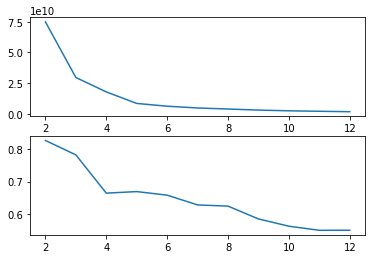

In [127]:
fig, axs = plt.subplots(2)
axs[0].plot(analysis_models['inertia'])
axs[1].plot(analysis_models['score'])
plt.show()